In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
  import platform
import numpy as np

In [ ]:
system_name = platform.system()
if system_name == 'Windows':
    print('Windows OS')
    plt.rc('font', family = 'Malgun Gothic')
    
elif system_name == 'Darwin':
    print('Mac OS')
    plt.rc('font', family = 'AppleGothic')
    
elif system_name == 'Linux':
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname = path, size = 12)
    plt.rc('font', family = font_name)
    
else:
    print('Not support')

Windows OS


In [ ]:
weatherDF = pd.read_csv('../data/daegu_utf8.csv')
weatherDF.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0


In [ ]:
weatherDF.날짜 = pd.to_datetime(weatherDF.날짜, format = '%Y-%m-%d')
weatherDF.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0


In [ ]:
year_start = int(input('시작 연도를 입력하세요 : (ex. 1994)'))
year_end = int(input('마지막 연도를 입력하세요 : (ex. 2012)'))
month = int(input('기온 변화를 측정할 달을 입력하세요 : (ex. 4)'))

시작 연도를 입력하세요 : (ex. 1994)1967
마지막 연도를 입력하세요 : (ex. 2012)2009
기온 변화를 측정할 달을 입력하세요 : (ex. 4)1


In [ ]:
weatherDF[weatherDF['날짜'].dt.month == month]

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41295,2022-01-27,143,3.2,-2.1,9.7
41296,2022-01-28,143,2.3,-0.3,6.7
41297,2022-01-29,143,1.0,-1.7,5.5
41298,2022-01-30,143,1.1,-4.2,6.5


In [ ]:
weatherDF[(weatherDF['날짜'].dt.year >= year_start) & (weatherDF['날짜'].dt.year <= year_end)]

,날짜,지점,평균기온,최저기온,최고기온
21184,1967-01-01,143,0.1,-3.1,2.6
21185,1967-01-02,143,-4.3,-7.0,-1.9
21186,1967-01-03,143,-6.9,-9.3,-3.5
21187,1967-01-04,143,-6.1,-9.4,-1.5
21188,1967-01-05,143,-2.3,-6.7,2.1
...,...,...,...,...,...
36883,2009-12-27,143,-1.7,-6.7,4.3
36884,2009-12-28,143,-2.5,-5.6,2.0
36885,2009-12-29,143,-1.5,-8.6,4.7
36886,2009-12-30,143,1.2,-3.0,6.2


In [ ]:
result_high = []
result_low = []

for i in range(year_start, year_end+1):
    result_high.append(round(weatherDF[(weatherDF['날짜'].dt.year == i) & 
          (weatherDF['날짜'].dt.month == month)]['최고기온'].mean(), 1))
    result_low.append(round(weatherDF[(weatherDF['날짜'].dt.year == i) & 
          (weatherDF['날짜'].dt.month == month)]['최저기온'].mean(), 1))
    
print(result_high)
print(result_low)

[3.4, 4.2, 3.8, 3.7, 4.5, 7.1, 6.1, 5.3, 4.1, 4.5, 1.1, 5.9, 7.6, 4.7, 2.1, 4.9, 5.6, 3.1, 3.6, 4.2, 5.1, 6.6, 7.4, 4.6, 5.7, 7.5, 5.2, 6.7, 6.0, 6.2, 5.7, 5.6, 6.8, 5.1, 4.7, 6.7, 4.3, 6.0, 5.4, 7.0, 8.1, 5.6, 5.8]
[-7.0, -5.3, -4.7, -7.5, -4.8, -1.7, -1.6, -6.4, -3.9, -6.4, -7.9, -3.7, -2.5, -4.8, -6.8, -5.3, -4.0, -6.9, -7.2, -5.9, -4.1, -3.2, -1.0, -4.3, -3.5, -1.7, -3.2, -3.5, -3.8, -3.6, -4.2, -2.8, -2.8, -2.7, -2.9, -1.4, -4.4, -3.3, -3.3, -1.2, -0.7, -2.0, -3.7]


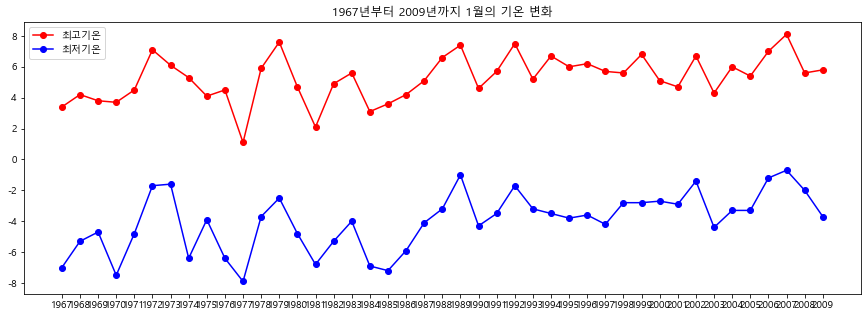

In [ ]:
list = []

for i in range(year_start, year_end+1): list.append(str(i))

plt.figure(figsize = (15, 5))

plt.plot(result_high, 'r' , marker = 'o', label = '최고기온')
plt.plot(result_low, 'b', marker = 'o', label = '최저기온')

plt.xticks(np.arange(0, year_end+1 - year_start), list)
plt.title(f'{year_start}년부터 {year_end}년까지 {month}월의 기온 변화')
plt.rc('axes', unicode_minus = False)
plt.legend()
plt.show()